<h3>Hoc máy</h3>
<li>Hiểu được supervised    --> out nam trong tap du lieu</li>
<li>Un-supervised          --> output nam ngoai tap du lieu</li> 

<h5>1. Giải thuật K-NN (lazing Learning): tìm ra 5 thằng gần bằng giá trị nhất và xét output để kết luận  </h5>
<h5>Độ đo tương đồng: distance function</h5>
<p>Ngưỡng mặt định (thresold): 50%</p>

#### 1. Nhập thư viện

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Đọc dữ liệu từ Excel:

In [4]:
# B1
df = pd.read_excel('heart_short.xlsx',sheet_name="data")

df


,name,t_i,c_i,target
0,An,145,233,1
1,Binh,130,250,1
2,Thanh,130,204,1
3,Tu,130,254,0
4,Anh,140,203,0
5,Thanh An,130,256,0
6,Quoc,140,294,1
7,Kien,120,263,1
8,Long,172,199,1
9,Vu,150,168,1


In [5]:
# B2: Xu ly du lieu
X = df[['t_i','c_i']].values # input
y = df[['target']].values # output

X = X.astype(float)
y = y.astype(float)

In [6]:
df.index


RangeIndex(start=0, stop=12, step=1)

In [7]:
df1 = pd.read_csv('heart_full.csv')
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
import math
a = math.sqrt((150 - 145)**2 + (200-233)**2)
print(a)

33.37663853655727


#### 3. Chia dữ liệu thành biến đầu vào và đầu ra:


In [ ]:
import pandas as pd

# Đọc dữ liệu từ heart_full.csv và heart_short.xlsx
df_full = pd.read_csv('heart_full.csv')
df_short = pd.read_excel('heart_short.xlsx', sheet_name='data')

# Kết hợp hai bảng dựa trên cột 'target'
df_combined = pd.merge(df_full, df_short, on='target', how='inner')

# Trích xuất các cột input X và output y
# X = df_combined[['age', 't_index', 'f_status', 'c_index']].values # Input features
X = df_combined[['age', 't_index', 'c_index']].values 
y = df_combined[['target']].values # Output (target)

# Đảm bảo dữ liệu là kiểu float
X = X.astype(float)
y = y.astype(float)

# In thử dữ liệu để kiểm tra
print(X)
print(y)


#### 4. Chia dữ liệu thành tập huấn luyện và kiểm thử:


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=16)
# train_test_split: Chia dữ liệu thành tập huấn luyện và kiểm thử với tỷ lệ 70% - 30%. Tập kiểm thử chiếm 30% dữ liệu.

#### 5. Huấn luyện mô hình KNN:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_train, y_train)
# Sử dụng mô hình K-Nearest Neighbors với k=5 để dự đoán nhãn đầu ra.
# knnModel.fit(X_train, y_train): Huấn luyện mô hình dựa trên tập huấn luyện.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

#### 6. Dự đoán và đánh giá mô hình:

In [9]:
y_test_predicted = knnModel.predict(X_test)
knnModel.score(X_test, y_test)
# knnModel.predict(X_test): Dự đoán nhãn đầu ra cho tập kiểm thử.
# knnModel.score(X_test, y_test): Tính toán độ chính xác của mô hình trên tập kiểm thử.

1.0

#### 7. Tính toán các chỉ số đánh giá:


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)

def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    vprecision = tp/(tp+fp)
    vrecall = tp/(tp+fn)
    vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

    return vprecision,vrecall,vf1
print("precision, recall, f1:", myscores(cf_matrix))


precision, recall, f1: (1.0, 1.0, 1.0)


#### 8. Báo cáo phân loại:


In [11]:
from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))
# classification_report: Xuất báo cáo chi tiết về các chỉ số đánh giá 
# (precision, recall, F1-score) cho cả hai nhãn ("Không bệnh" và "Có bệnh").

              precision    recall  f1-score   support

  Không bệnh       1.00      1.00      1.00       204
     Có bệnh       1.00      1.00      1.00       350

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



#### 9.Vẽ biểu đồ AUC-ROC:

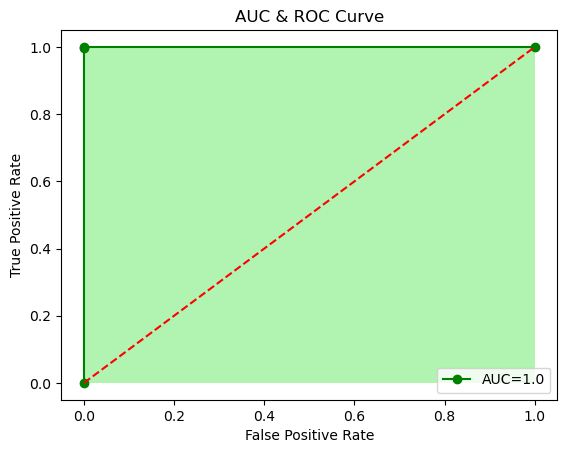

In [12]:
from sklearn import metrics
y_pred_proba = knnModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()
# ROC Curve: Vẽ biểu đồ ROC để đánh giá hiệu năng của mô hình phân loại.
# AUC: Diện tích dưới đường cong ROC.

#### 10. Lưu mô hình vào file:


In [13]:
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))
# pickle: Lưu mô hình đã huấn luyện vào file model_KNN_Heart.sav.


#### 11. Tải mô hình và dự đoán dữ liệu mới:


In [40]:
import pickle
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

v1 = float(input('age: '))
v2 = float(input('t_index: '))
# v3 = float(input('f_status: '))
v4 = float(input('c_index: '))

y_pred = loaded_model.predict([[v1,v2,v3,v4]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")
# Sau khi tải lại mô hình, người dùng có thể nhập các thông số như tuổi, t_index, f_status, c_index 
# và mô hình sẽ dự đoán người đó có bị bệnh tim hay không.

<p>Kết luận:</p>
  <ul><li>Đoạn mã này sử dụng mô hình KNN để dự đoán bệnh tim dựa trên các yếu tố đầu vào như tuổi, chỉ số t_index, f_status, và c_index.</li>
<li>Độ chính xác của mô hình và các chỉ số như precision, recall, F1-score và AUC được tính toán và trực quan hóa thông qua biểu đồ ROC.</li> </ul>